# Discriminant Functions

In this algorithm, we **plot each data item as a point in n-dimensional space** (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well

In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [128]:
means = [[0.3, 0.2],
         [0.2, 0.7]]

cov = [[[0.1,0.1],[0.1,0.1]],
       [[0.1,0.1],[0.1,0.1]]]

n_samples = 50

x_1 = np.random.multivariate_normal(means[0], cov[0], size=(n_samples))
y_1 = np.zeros(n_samples, dtype=np.int32)
x_2 = np.random.multivariate_normal(means[1], cov[1], size=(n_samples))
y_2 = np.ones(n_samples, dtype=np.int32)
x   = np.concatenate([x_1, x_2])
y   = np.concatenate([y_1, y_2])
xx, yy = make_meshgrid(x, y)

In [130]:
xx

array([[-1.75614668, -1.73614668, -1.71614668, ...,  2.42385332,
         2.44385332,  2.46385332],
       [-1.75614668, -1.73614668, -1.71614668, ...,  2.42385332,
         2.44385332,  2.46385332],
       [-1.75614668, -1.73614668, -1.71614668, ...,  2.42385332,
         2.44385332,  2.46385332],
       ...,
       [-1.75614668, -1.73614668, -1.71614668, ...,  2.42385332,
         2.44385332,  2.46385332],
       [-1.75614668, -1.73614668, -1.71614668, ...,  2.42385332,
         2.44385332,  2.46385332],
       [-1.75614668, -1.73614668, -1.71614668, ...,  2.42385332,
         2.44385332,  2.46385332]])

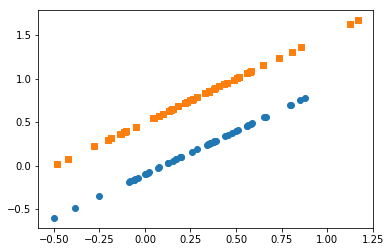

In [114]:
plt.plot(x[y==0][:,0], x[y==0][:,1], 'o')
plt.plot(x[y==1][:,0], x[y==1][:,1], 's')

In [135]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from mlxtend.plotting import plot_decision_regions

In [116]:
x, y = shuffle(x, y)
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [119]:
model = svm.SVC(kernel='linear') 
model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [131]:
y_pred = model.predict(x_test)

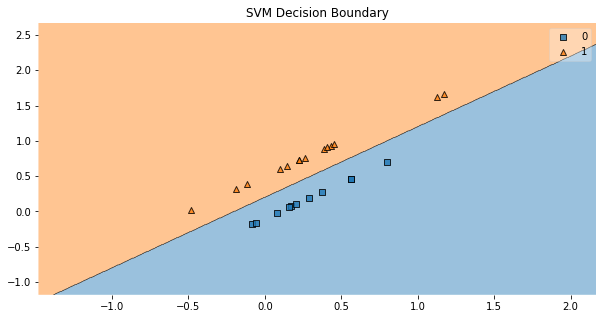

In [141]:
plt.figure(figsize=(10,5))
plot_decision_regions(X=x_test, 
                      y=y_pred,
                      clf=model, 
                      legend=1)
plt.title('SVM Decision Boundary')
plt.show()

SVM has a technique called the kernel trick. These are functions which takes low dimensional input space and transform it to a higher dimensional space i.e. it converts not separable problem to separable problem, these functions are called kernels. It is mostly useful in non-linear separation problem. Simply put, it does some extremely complex data transformations, then find out the process to separate the data based on the labels or outputs you’ve defined.

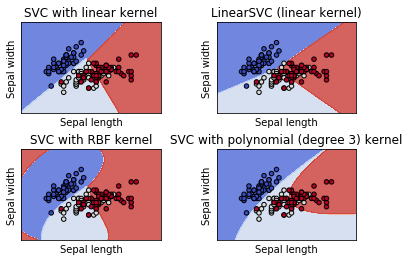

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()